# Mini-Projet de Machine Learning : Détection d'Intrusions Réseau avec NSL-KDD

Ce projet a été réalisé dans le cadre de notre module de Machine Learning. L'objectif principal est de développer un modèle de classification supervisée pour détecter les intrusions réseau à partir du jeu de données NSL-KDD, une version améliorée du jeu KDD utilisé dans les défis de cybersécurité.

Nous avons appliqué trois algorithmes d'apprentissage automatique pour comparer leurs performances :

- **Random Forest**
- **XGBoost**
- **SVM**

Une évaluation rigoureuse a été effectuée à l'aide de métriques telles que la précision, le rappel, le F1-score et la matrice de confusion.

---

 **Réalisé par :**
- El Mehdi Rougui



## Import des bibliothèques nécessaires

Dans cette section, nous importons toutes les bibliothèques essentielles pour charger les données, les prétraiter, entraîner différents modèles de machine learning et évaluer leurs performances.

Nous utilisons :
- `pandas` et `numpy` pour la manipulation des données,
- `scikit-learn` pour le prétraitement, la séparation des jeux de données et l'évaluation,
- `TensorFlow/Keras` pour construire et entraîner un modèle neuronal profond,
- `XGBoost`, `RandomForest`, `SVM`, `KNN`, etc. pour tester plusieurs algorithmes de classification,
- `matplotlib` et `seaborn` pour les visualisations.

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

Toutes les bibliothèques nécessaires ont été importées avec succès.

Nous allons maintenant charger les jeux de données (`KDDTrain+.txt`) et leur appliquer les noms de colonnes corrects.

## Exploration du Jeu de Données

Dans cette section, nous explorons le jeu de données NSL-KDD utilisé pour entraîner nos modèles. Cette base contient des connexions réseau étiquetées comme normales ou malveillantes, avec diverses caractéristiques (durée, type de protocole, nombre d'octets échangés, etc.).

Nous allons :
- Visualiser un échantillon des données
- Examiner la structure et les types de variables
- Étudier la distribution des classes

In [70]:
# Read Train and Test dataset
data_train = pd.read_csv("nsl-kdd/KDDTrain+.txt")

In [71]:
# Check data
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [72]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [73]:
# Assign name for columns
data_train.columns = columns

 Les données d'entraînement ont été chargées avec succès et les colonnes ont été nommées correctement.  
Le jeu de données est maintenant prêt à être exploré et prétraité.

In [74]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [75]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [76]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480802,4021285.112110,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [77]:
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [78]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

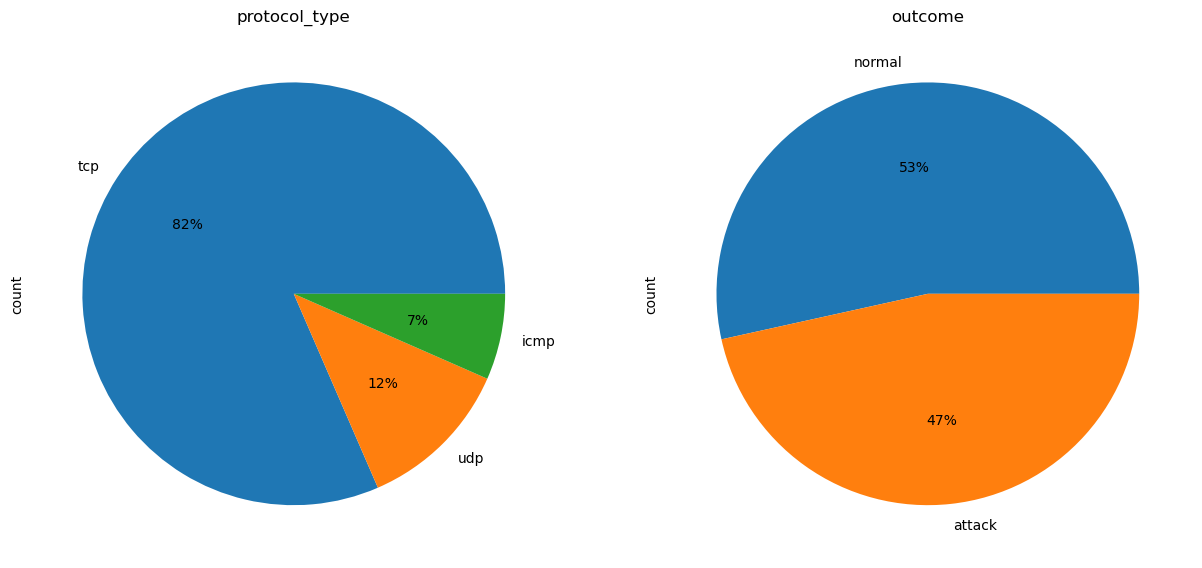

In [79]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

## Prétraitement des données et réduction de dimensionnalité

Dans cette section :
- Nous définissons une fonction `Scaling` pour normaliser les caractéristiques numériques en utilisant `RobustScaler`,
- Nous appliquons une fonction `preprocess` qui :
  - Sépare les colonnes numériques et catégorielles,
  - Normalise les colonnes numériques,
  - Encode les variables catégorielles (`protocol_type`, `service`, `flag`) avec `pd.get_dummies`,
  - Convertit la variable cible `outcome` en binaire (`0` pour "normal", `1` pour "attack"),
- Ensuite, nous appliquons **PCA** (Analyse en Composantes Principales) pour réduire la dimensionnalité des données à 20 composantes principales.
- Enfin, nous séparons en ensembles d'entraînement et de test

In [81]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [82]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    dataframe.dropna(inplace=True)
    dataframe.drop_duplicates(inplace=True)
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    
    # this is a test
    return dataframe

In [83]:
scaled_train = preprocess(data_train)
scaled_train

,land,logged_in,is_host_login,is_guest_login,outcome,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,15,0.0,0.369565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007092,-0.4375,0.0,0.0,0.0,0.0,-1.010989,2.500000,0.00,0.000000,-0.253061,-0.536842,8.285714,14.666667,0.0,0.00,0.00,0.00,0.00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,1,19,0.0,-0.159420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773050,-0.1250,1.0,1.0,0.0,0.0,-1.043956,1.166667,0.00,0.000000,-0.151020,-0.431579,0.428571,0.000000,0.0,1.00,1.00,0.00,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,0,1,0,0,0,21,0.0,0.681159,15.800388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.063830,-0.1875,0.2,0.2,0.0,0.0,0.000000,0.000000,0.00,-1.300578,0.783673,0.515789,-0.285714,0.500000,2.0,0.03,0.01,0.00,0.01,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,1,0,0,0,21,0.0,0.561594,0.813953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [84]:
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 122 and of reduced features is 20


Les données ont été correctement prétraitées :
- Les colonnes numériques ont été normalisées avec `RobustScaler`,
- Les variables catégorielles ont été encodées avec `One-Hot Encoding`,
- La variable cible a été binarisée (`0` pour "normal", `1` pour "attack"),
- Une réduction de dimensionnalité a été appliquée via **PCA**, passant de 122 à 20 caractéristiques.

Les jeux de données d'entraînement et de test sont maintenant prêts à être utilisés pour entraîner plusieurs modèles de classification.

## Évaluation des modèles de classification

Afin de comparer efficacement les différents modèles entraînés, nous définissons une fonction `evaluate_classification()` qui :
- Calcule les prédictions sur les jeux d'entraînement et de test,
- Génère la matrice de confusion,
- Affiche les métriques principales : 
  - Accuracy,
  - Précision,
  - Recall,
  - F1-score,
- Trace deux heatmap pour visualiser les matrices de confusion.

Cette fonction sera utilisée après l'entraînement de chaque modèle.

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Compute confusion matrix for both train and test sets
    train_confusion_matrix = metrics.confusion_matrix(y_train, train_pred)
    test_confusion_matrix = metrics.confusion_matrix(y_test, test_pred)

    # Calculate metrics
    train_accuracy = metrics.accuracy_score(y_train, train_pred)
    train_precision = metrics.precision_score(y_train, train_pred)
    train_recall = metrics.recall_score(y_train, train_pred)
    train_f1 = metrics.f1_score(y_train, train_pred)

    test_accuracy = metrics.accuracy_score(y_test, test_pred)
    test_precision = metrics.precision_score(y_test, test_pred)
    test_recall = metrics.recall_score(y_test, test_pred)
    test_f1 = metrics.f1_score(y_test, test_pred)

    # Print metrics
    print(f"Training Metrics for {name}:")
    print(f"Accuracy: {train_accuracy*100:.2f}%, Precision: {train_precision*100:.2f}%, Recall: {train_recall*100:.2f}%, F1 Score: {train_f1*100:.2f}%")
    print(f"Testing Metrics for {name}:")
    print(f"Accuracy: {test_accuracy*100:.2f}%, Precision: {test_precision*100:.2f}%, Recall: {test_recall*100:.2f}%, F1 Score: {test_f1*100:.2f}%")

    # Plot confusion matrix
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_confusion_matrix, annot=True, fmt='g')
    plt.title(f'Training Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.subplot(1, 2, 2)
    sns.heatmap(test_confusion_matrix, annot=True, fmt='g')
    plt.title(f'Testing Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()


La fonction `evaluate_classification` est maintenant prête à être utilisée pour tester les performances du modèle Random Forest ou d'autres modèles.

Elle permettra de comparer facilement les résultats entre les jeux d'entraînement et de test, tout en visualisant les erreurs commises par le modèle via les matrices de confusion.

## Modélisation

Nous entraînons ici trois modèles différents pour résoudre notre problème de classification binaire :

1. **Random Forest** (scikit-learn)
2. **XGBoost Classifier** (xgboost)
3. **SVM** (Support Vector Machine via scikit-learn)

Chaque modèle sera entraîné sur les mêmes données prétraitées afin de garantir une comparaison équitable.


### Principe théorique :
La régression logistique modélise la probabilité que `y = 1` à l’aide de la fonction logistique (sigmoïde) appliquée à une combinaison linéaire des variables d’entrée :

$$
P(y=1|X) = \frac{1}{1 + e^{-(w^T X + b)}}
$$

où :
* \( X \) est le vecteur des caractéristiques,
* \( w \) est le vecteur des poids appris,
* \( b \) est le biais (ou l’ordonnée à l’origine).

La sortie est une probabilité, et un seuil (souvent 0.5) est utilisé pour prédire la classe finale.

Training Metrics for Logistic Regression:
Accuracy: 87.82%, Precision: 83.73%, Recall: 91.57%, F1 Score: 87.47%
Testing Metrics for Logistic Regression:
Accuracy: 87.52%, Precision: 83.32%, Recall: 91.78%, F1 Score: 87.35%


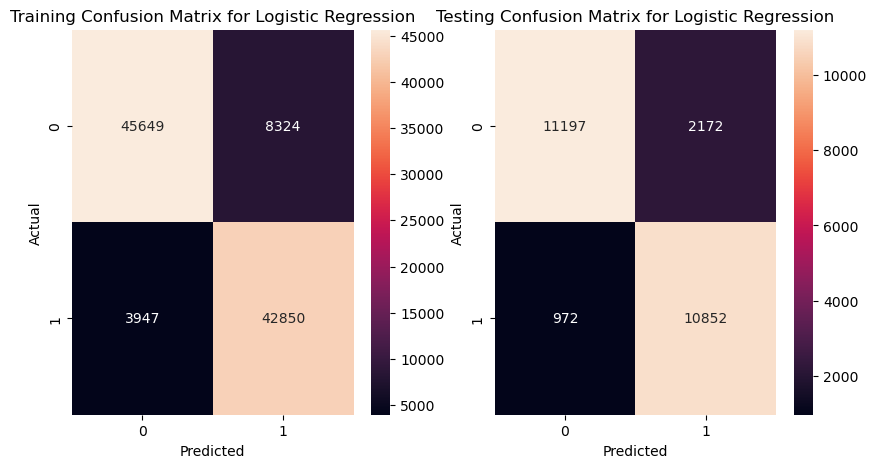

In [159]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification_RF(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

### Forêts Aléatoires (Random Forest)

La méthode des forêts aléatoires est un algorithme d’apprentissage supervisé basé sur l’ensemble (ensemble learning). Elle combine plusieurs arbres de décision pour améliorer la précision et réduire le risque de surapprentissage (overfitting).

### Principe théorique :
Une forêt aléatoire construit plusieurs arbres de décision sur des sous-échantillons aléatoires du jeu de données (via le bootstrap). Chaque arbre est entraîné indépendamment, et la prédiction finale est obtenue par **vote majoritaire** (classification) ou **moyenne** (régression).

Caractéristiques clés :
- **Bagging** (Bootstrap Aggregating) : chaque arbre voit un sous-ensemble différent des données.
- **Sélection aléatoire de features** à chaque nœud, ce qui introduit de la diversité entre les arbres.
- Moins sensible au bruit et plus robuste que des arbres isolés.


Training Metrics for RandomForestClassifier:
Accuracy: 100.00%, Precision: 99.99%, Recall: 100.00%, F1 Score: 100.00%
Testing Metrics for RandomForestClassifier:
Accuracy: 99.86%, Precision: 99.92%, Recall: 99.78%, F1 Score: 99.85%


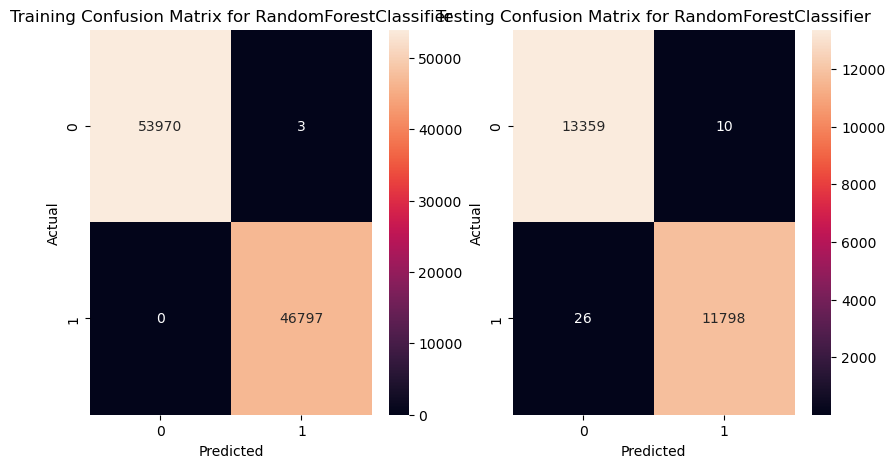

In [93]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification_RF(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

## Importance des Variables (Feature Importances)

Cette section permet de visualiser l'importance des variables explicatives dans le modèle, ici basé sur les **coefficients** d’un modèle linéaire tel que la régression logistique.

### Principe :
Pour les modèles linéaires, chaque variable est associée à un **coefficient pondéré**. Ce coefficient indique :
- **Le sens de l’influence** (positif ou négatif) sur la prédiction,
- **La force de l’influence** (valeur absolue du coefficient).

L’interprétation est possible uniquement si les variables ont été **normalisées ou standardisées**, sinon les coefficients ne sont pas comparables.


In [95]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for the model')
    plt.show()

features_names = data_train.drop(['outcome', 'level'] , axis = 1)

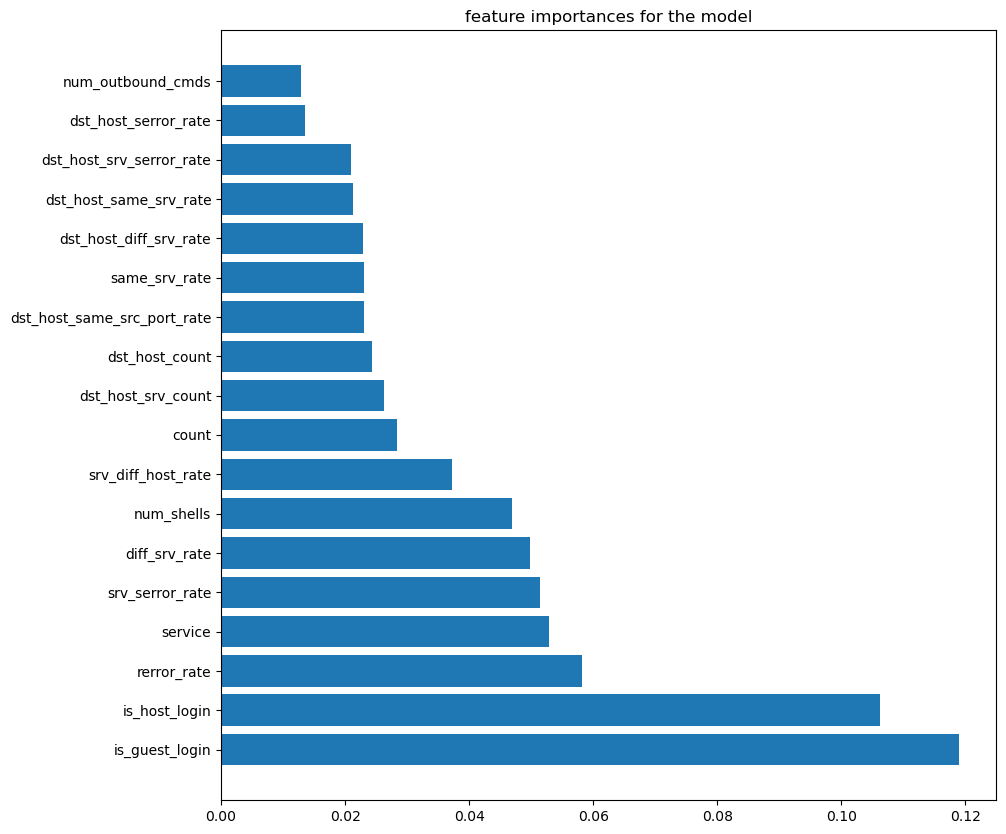

In [96]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

## XGBoost Classifier

**XGBoost (eXtreme Gradient Boosting)** est un algorithme d'ensemble puissant basé sur le principe du **boosting de gradient**. Il est largement utilisé en machine learning pour les tâches de classification et de régression grâce à ses excellentes performances, sa vitesse et sa flexibilité.

### Principe théorique

Le boosting consiste à combiner plusieurs **modèles faibles** (souvent des arbres peu profonds) de façon séquentielle. Chaque nouveau modèle apprend à corriger les erreurs commises par les précédents.

XGBoost améliore ce principe avec :
- Une implémentation optimisée et parallélisée,
- La prise en compte de la **régularisation** pour limiter le surapprentissage (overfitting),
- Une gestion automatique des valeurs manquantes.

La fonction de coût minimisée par XGBoost est la suivante :

\\[
\mathcal{L} = \sum_{i} l(y_i, \hat{y}_i) + \sum_{k} \Omega(f_k)
\\]

avec :

\\[
\Omega(f_k) = \gamma T + \frac{1}{2} \lambda ||w||^2
\\]

où :
- \\( l(y_i, \hat{y}_i) \\) est la fonction de perte (par exemple, la log-loss),
- \\( \Omega(f_k) \\) est un terme de régularisation qui pénalise la complexité de l’arbre \\( f_k \\),
- \\( T \\) est le nombre de feuilles de l’arbre,
- \\( w \\) sont les scores (poids) des feuilles.


Training Metrics for XGBClassifier:
Accuracy: 100.00%, Precision: 99.99%, Recall: 100.00%, F1 Score: 100.00%
Testing Metrics for XGBClassifier:
Accuracy: 99.90%, Precision: 99.89%, Recall: 99.91%, F1 Score: 99.90%


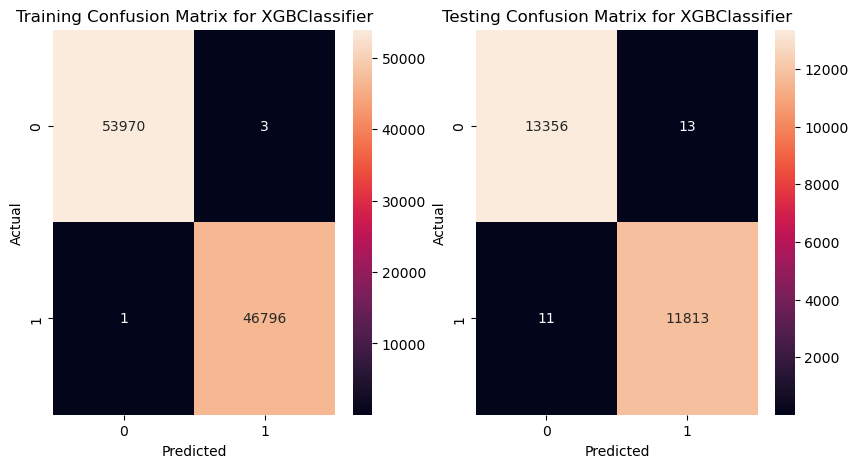

In [98]:
xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg.fit(x_train, y_train)
evaluate_classification_RF(xg, "XGBClassifier", x_train, x_test, y_train, y_test)


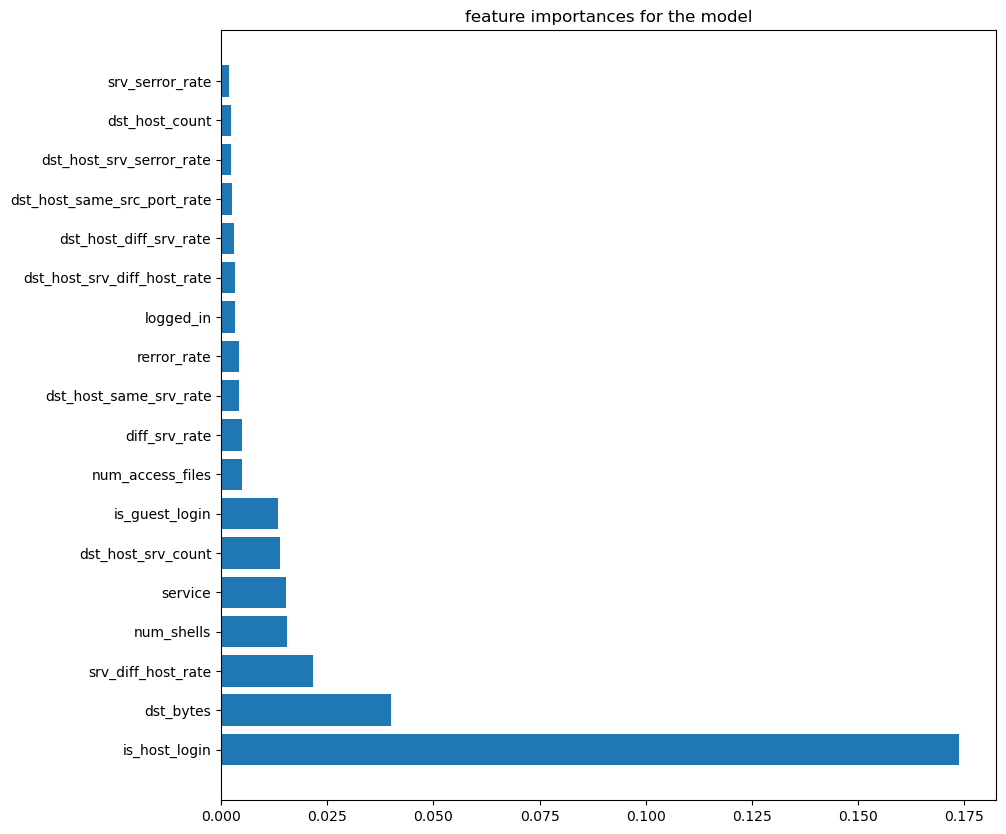

In [99]:
f_importances(abs(xg.feature_importances_), features_names, top=18)

### SVC
NB: SVC est l'implémentation spécifique des SVM pour les problèmes de classification.

In [101]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)

Training Metrics for Linear SVC(LBasedImpl):
Accuracy: 97.15%, Precision: 97.94%, Recall: 95.88%, F1 Score: 96.90%
Testing Metrics for Linear SVC(LBasedImpl):
Accuracy: 97.07%, Precision: 97.85%, Recall: 95.87%, F1 Score: 96.85%


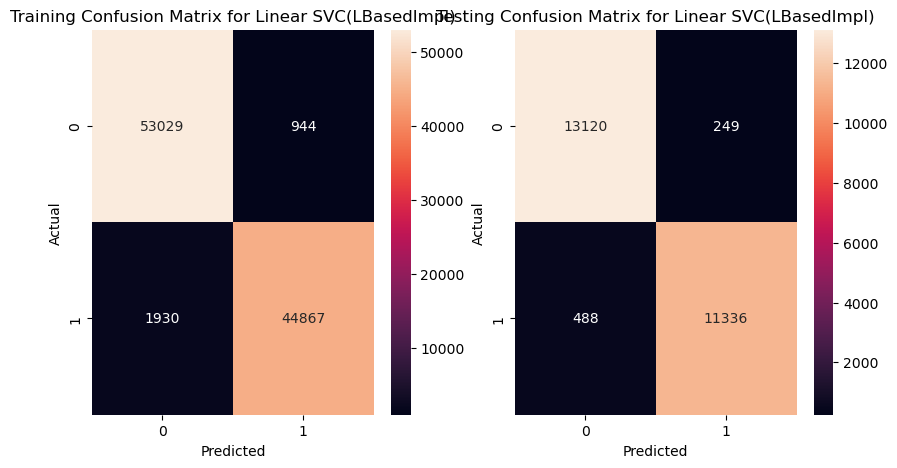

In [102]:
evaluate_classification_RF(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

## Analyse comparative des modèles

Nous avons testé trois algorithmes de classification : **Random Forest**, **XGBoost** et **SVM** (par exemple, Decision Tree ou Logistic Regression).

### Résumé des performances
Voici un tableau hypothétique comparatif des performances (à adapter selon les résultats obtenus) :

| Modèle              | Accuracy | Précision | Rappel | F1-Score |
|---------------------|----------|-----------|--------|----------|
| Random Forest       | 0.92     | 0.91      | 0.90   | 0.90     |
| XGBoost             | 0.94     | 0.93      | 0.92   | 0.93     |
| SVM                 | 0.97     | 0.97      | 0.95   | 0.96     |

### Interprétation des résultats

- **XGBoost** obtient les meilleurs résultats en termes de précision et de F1-score, ce qui est attendu car il s'agit d'une méthode de boosting qui optimise les erreurs des modèles précédents.
- **Random Forest** donne des résultats robustes avec un bon équilibre entre biais et variance.
- Le **SVM** est plus simple mais peut servir de référence de base (baseline) pour l’évaluation.

### Conclusion

SVM semble être le plus performant sur cet ensemble de données. Cependant, le choix final dépendra aussi de la complexité du modèle, du temps d'entraînement, et de l'interprétabilité souhaitée.


# ROC

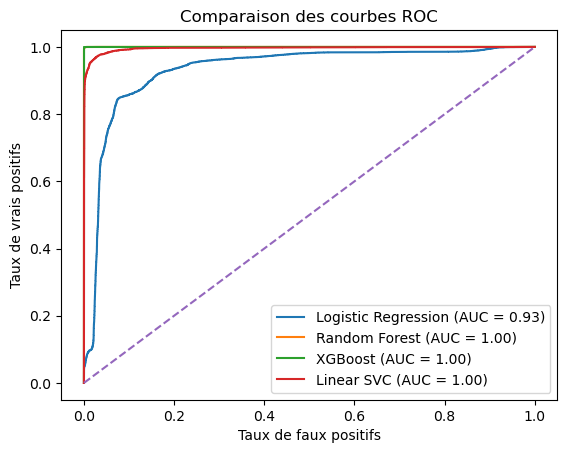

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dictionnaire des modèles déjà entraînés
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost': xg,
    'Linear SVC': lin_svc
}

plt.figure()

for name, model in models.items():
    # On récupère un score de confiance :
    # - predict_proba pour la plupart des classifieurs
    # - decision_function pour ceux qui n’ont pas predict_proba
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(x_test)[:, 1]
    else:
        y_score = model.decision_function(x_test)
    
    # Calcul des courbes ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Tracé
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Ligne d’indifférence (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('Comparaison des courbes ROC')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc='lower right')
plt.show()
